In [30]:
# Importing necessary packages
import pandas as pd
import sqlite3
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


print("Succefully imported libraries!")

Succefully imported libraries!


In [49]:
df1=pd.read_csv("bom.movie_gross.csv")
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [50]:
df1.tail()


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [51]:
print("Data frame rows and columns :",df1.shape)

Data frame rows and columns : (3387, 5)


In [52]:
print("Stats about the data :", df1.describe())

Stats about the data :        domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000


In [53]:
unique_studios = df1['studio'].unique()
print(unique_studios)


['BV' 'WB' 'P/DW' 'Sum.' 'Par.' 'Uni.' 'Fox' 'Wein.' 'Sony' 'FoxS' 'SGem'
 'WB (NL)' 'LGF' 'MBox' 'CL' 'W/Dim.' 'CBS' 'Focus' 'MGM' 'Over.' 'Mira.'
 'IFC' 'CJ' 'NM' 'SPC' 'ParV' 'Gold.' 'JS' 'RAtt.' 'Magn.' 'Free' '3D'
 'UTV' 'Rela.' 'Zeit.' 'Anch.' 'PDA' 'Lorb.' 'App.' 'Drft.' 'Osci.' 'IW'
 'Rog.' nan 'Eros' 'Relbig.' 'Viv.' 'Hann.' 'Strand' 'NGE' 'Scre.' 'Kino'
 'Abr.' 'CZ' 'ATO' 'First' 'GK' 'FInd.' 'NFC' 'TFC' 'Pala.' 'Imag.' 'NAV'
 'Arth.' 'CLS' 'Mont.' 'Olive' 'CGld' 'FOAK' 'IVP' 'Yash' 'ICir' 'FM'
 'Vita.' 'WOW' 'Truly' 'Indic.' 'FD' 'Vari.' 'TriS' 'ORF' 'IM' 'Elev.'
 'Cohen' 'NeoC' 'Jan.' 'MNE' 'Trib.' 'Rocket' 'OMNI/FSR' 'KKM' 'Argo.'
 'SMod' 'Libre' 'FRun' 'WHE' 'P4' 'KC' 'SD' 'AM' 'MPFT' 'Icar.' 'AGF'
 'A23' 'Da.' 'NYer' 'Rialto' 'DF' 'KL' 'ALP' 'LG/S' 'WGUSA' 'MPI' 'RTWC'
 'FIP' 'RF' 'ArcEnt' 'PalUni' 'EpicPics' 'EOne' 'LD' 'AF' 'TFA' 'Myr.'
 'BM&DH' 'SEG' 'PalT' 'Outs' 'OutF' 'BSM' 'WAMCR' 'PM&E' 'A24' 'Cdgm.'
 'Distrib.' 'Imax' 'PH' 'HTR' 'ELS' 'PI' 'E1' 'TVC' 'FEF' 'EXCL

In [54]:

# Map categorical values to numerical values
df1['studio'] = pd.factorize(df1['studio'])[0]

# Print the updated dataframe
print(df1)


                                            title  studio  domestic_gross  \
0                                     Toy Story 3       0     415000000.0   
1                      Alice in Wonderland (2010)       0     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1       1     296000000.0   
3                                       Inception       1     292600000.0   
4                             Shrek Forever After       2     238700000.0   
...                                           ...     ...             ...   
3382                                    The Quake      29          6200.0   
3383                  Edward II (2018 re-release)      71          4800.0   
3384                                     El Pacto       8          2500.0   
3385                                     The Swan     256          2400.0   
3386                            An Actor Prepares     188          1700.0   

     foreign_gross  year  
0        652000000  2010  
1        691300000  2

In [55]:
print("Data types of the variables :",df1.dtypes)

Data types of the variables : title              object
studio              int64
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [58]:
print("Missing values:\n", df1.isnull().sum())


Missing values:
 title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [57]:
# Handling missing values
# Drop rows with any missing values
df1.dropna(inplace=True)


In [59]:
# Dropping un necessary columns
df1.drop("title",axis=1)

,studio,domestic_gross,foreign_gross,year
0,0,415000000.0,652000000,2010
1,0,334200000.0,691300000,2010
2,1,296000000.0,664300000,2010
3,1,292600000.0,535700000,2010
4,2,238700000.0,513900000,2010
...,...,...,...,...
3275,12,1400.0,1500000,2018
3286,21,725000.0,229000,2018
3309,249,10000.0,256000,2018
3342,252,93200.0,5200,2018


In [60]:
# Target variable 
y_target = df1["studio"]
#print('Target variable :',y_target.head())
y_target.head()

0    0
1    0
2    1
3    1
4    2
Name: studio, dtype: int64

In [61]:
df1.columns


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [62]:
# Variables to use 
x_variables = df1[['domestic_gross', 'foreign_gross', 'year']]
x_variables.head()

,domestic_gross,foreign_gross,year
0,415000000.0,652000000,2010
1,334200000.0,691300000,2010
2,296000000.0,664300000,2010
3,292600000.0,535700000,2010
4,238700000.0,513900000,2010


Visualizing the distribution of target variable


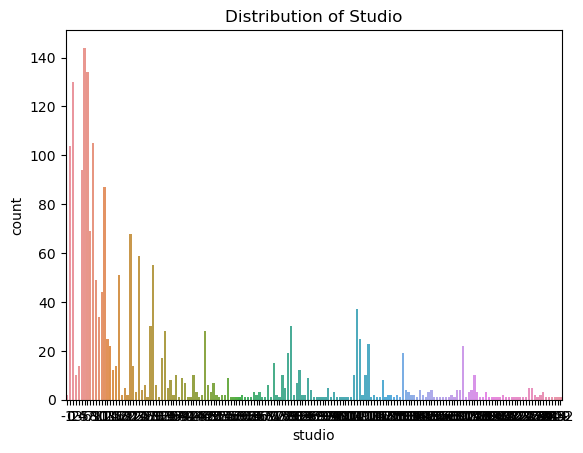

In [64]:
sns.countplot(x="studio", data=df1)
plt.title("Distribution of Studio")
plt.show()


Visualize the distribution of numerical data

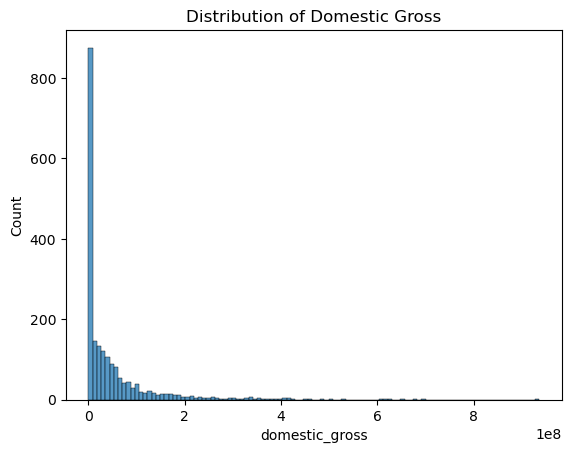

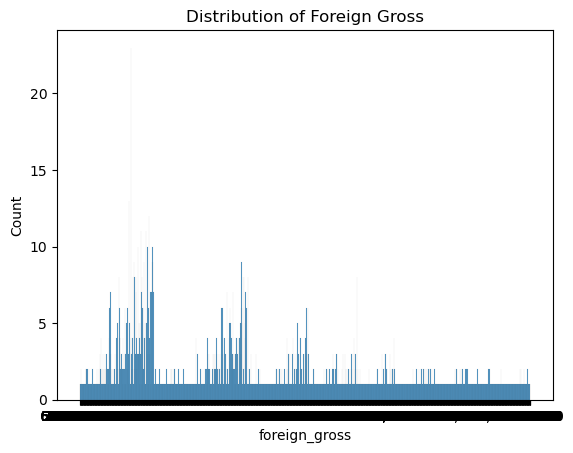

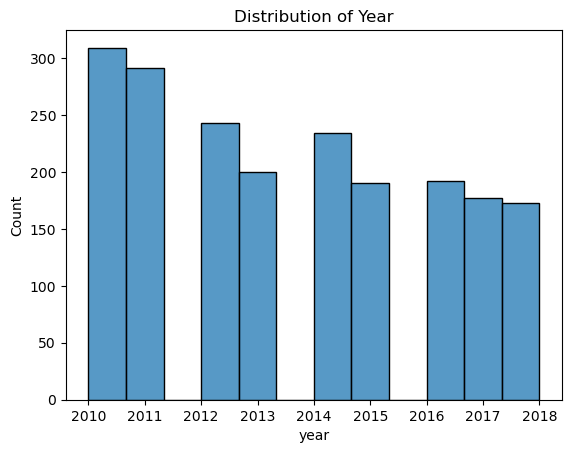

In [65]:
sns.histplot(x_variables["domestic_gross"])
plt.title("Distribution of Domestic Gross")
plt.show()

sns.histplot(x_variables["foreign_gross"])
plt.title("Distribution of Foreign Gross")
plt.show()

sns.histplot(x_variables["year"])
plt.title("Distribution of Year")
plt.show()


Visualizing the relationshipbetween independent variables 

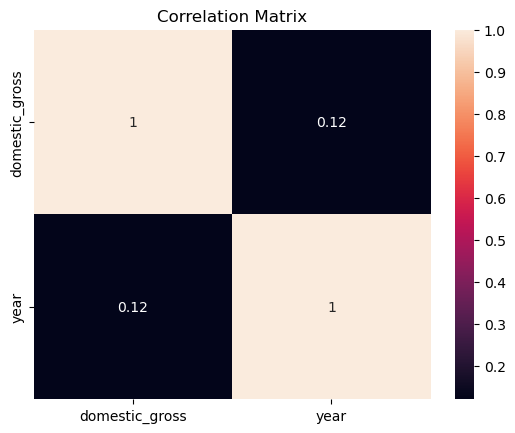

In [66]:
sns.heatmap(x_variables[["domestic_gross", "foreign_gross", "year"]].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


Visualizing the realtionship between independent variables and target variables


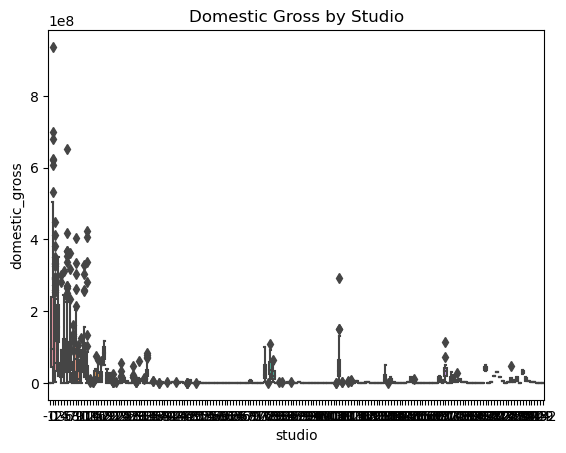

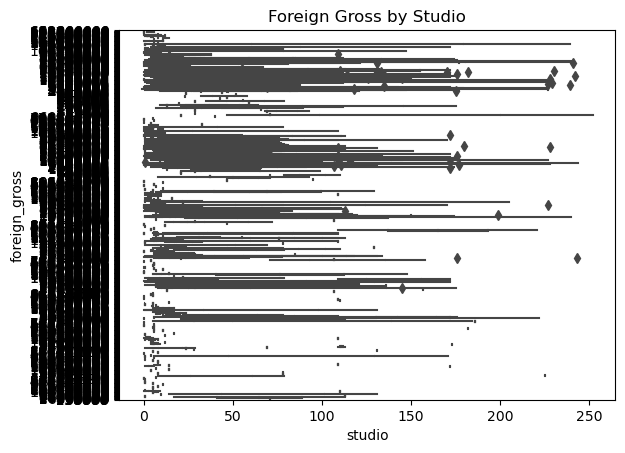

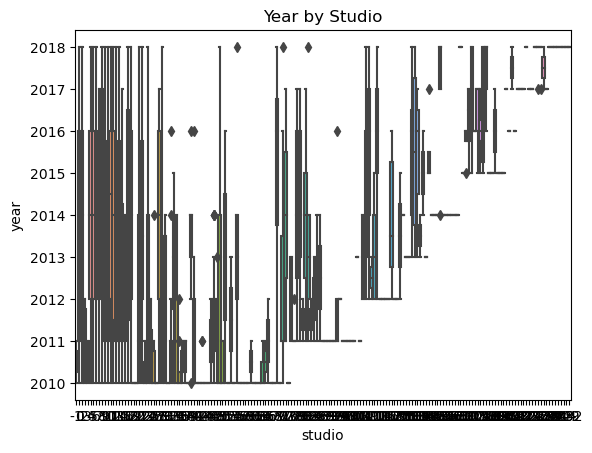

In [68]:
sns.boxplot(x="studio", y="domestic_gross", data=df1)
plt.title("Domestic Gross by Studio")
plt.show()

sns.boxplot(x="studio", y="foreign_gross", data=df1)
plt.title("Foreign Gross by Studio")
plt.show()

sns.boxplot(x="studio", y="year", data=df1)
plt.title("Year by Studio")
plt.show()


# sqlite im dataset


In [69]:

#connecting to sqlite
conn = sqlite3.connect("im.db")

#querying details from the data base
person_df=pd.read_sql_query("SELECT * FROM persons",conn)
                      
# Closing connection
conn.close()

# Display dataframe
person_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [71]:
#checking the last five columns
person_df.tail()

,person_id,primary_name,birth_year,death_year,primary_profession
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer"


In [72]:
print("Data frame rows and columns :",person_df.shape)

Data frame rows and columns : (606648, 5)


In [73]:
print("Stats about the data :", person_df.describe())

Stats about the data :          birth_year   death_year
count  82736.000000  6783.000000
mean    1967.043826  2000.523367
std       22.122190    43.951530
min        1.000000    17.000000
25%     1957.000000  2001.000000
50%     1971.000000  2013.000000
75%     1981.000000  2016.000000
max     2014.000000  2019.000000


In [74]:
#finding the unique value
# Loop through each column
for col in person_df.columns:
    # Get the unique values in the column
    unique_values = person_df[col].unique()
    # Print the column name and unique values
    print(col, unique_values)



person_id ['nm0061671' 'nm0061865' 'nm0062070' ... 'nm9991320' 'nm9991786'
 'nm9993380']
primary_name ['Mary Ellen Bauder' 'Joseph Bauer' 'Bruce Baum' ... 'Joo Yeon So'
 'Michelle Modigliani' 'Pegasus Envoyé']
birth_year [      nan 1.963e+03 1.945e+03 1.956e+03 1.971e+03 1.942e+03 1.948e+03
 1.961e+03 1.974e+03 1.962e+03 1.954e+03 1.966e+03 1.952e+03 1.955e+03
 1.978e+03 1.977e+03 1.925e+03 1.926e+03 1.980e+03 1.936e+03 1.907e+03
 1.969e+03 1.950e+03 1.975e+03 1.933e+03 1.972e+03 1.941e+03 1.939e+03
 1.946e+03 1.958e+03 1.960e+03 1.981e+03 1.944e+03 1.970e+03 1.897e+03
 1.957e+03 1.913e+03 1.964e+03 1.968e+03 1.940e+03 1.949e+03 1.965e+03
 1.904e+03 1.932e+03 1.973e+03 1.959e+03 1.931e+03 1.935e+03 1.976e+03
 1.937e+03 1.914e+03 1.910e+03 1.953e+03 1.982e+03 1.934e+03 1.947e+03
 1.984e+03 1.967e+03 1.986e+03 1.951e+03 1.826e+03 1.868e+03 1.987e+03
 1.830e+03 1.929e+03 1.938e+03 1.979e+03 1.943e+03 1.717e+03 1.924e+03
 1.927e+03 1.889e+03 1.988e+03 1.782e+03 1.930e+03 1.920e+03 1.983e+0

In [75]:
# Map categorical values to numerical values
person_df['primary_profession'] = pd.factorize(person_df['primary_profession'])[0]

# Print the updated dataframe
print(person_df)


        person_id         primary_name  birth_year  death_year  \
0       nm0061671    Mary Ellen Bauder         NaN         NaN   
1       nm0061865         Joseph Bauer         NaN         NaN   
2       nm0062070           Bruce Baum         NaN         NaN   
3       nm0062195         Axel Baumann         NaN         NaN   
4       nm0062798          Pete Baxter         NaN         NaN   
...           ...                  ...         ...         ...   
606643  nm9990381         Susan Grobes         NaN         NaN   
606644  nm9990690          Joo Yeon So         NaN         NaN   
606645  nm9991320       Madeline Smith         NaN         NaN   
606646  nm9991786  Michelle Modigliani         NaN         NaN   
606647  nm9993380       Pegasus Envoyé         NaN         NaN   

        primary_profession  
0                        0  
1                        1  
2                        2  
3                        3  
4                        4  
...                    ...  
6066

In [76]:
#the data types of the variables

print("Data types of the variables :",person_df.dtypes)

Data types of the variables : person_id              object
primary_name           object
birth_year            float64
death_year            float64
primary_profession      int64
dtype: object


In [77]:
#finding the missing values

print("Missing values:\n", person_df.isnull().sum())


Missing values:
 person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession         0
dtype: int64


In [78]:
# Handling missing values
# Drop rows with any missing values
person_df.dropna(inplace=True)

In [80]:
# Dropping un necessary columns
person_df.drop("death_year",axis=1)

,person_id,primary_name,birth_year,primary_profession
32,nm0071116,Valérie Benguigui,1961.0,29
38,nm0073426,Laxmikant Berde,1954.0,6
62,nm0083767,Fernando Birri,1925.0,47
64,nm0085193,Bill Black,1926.0,49
71,nm0087190,Maurice Blanchot,1907.0,54
...,...,...,...,...
603450,nm7911916,Lars-Inge Svartenbrandt,1945.0,-1
603750,nm8105033,Oscar Rabin,1928.0,-1
603895,nm8201131,Lewis Lucky Carrillo III,1968.0,22
604364,nm8659676,Zygmunt Bauman,1925.0,54


In [81]:
# Target variable 
y_target = person_df["primary_profession"]
#print('Target variable :',y_target.head())
y_target.head()

32    29
38     6
62    47
64    49
71    54
Name: primary_profession, dtype: int64

In [82]:
#columns
person_df.columns

Index(['person_id', 'primary_name', 'birth_year', 'death_year',
       'primary_profession'],
      dtype='object')

In [83]:
# Variables to use 
x_variables = person_df[['person_id', 'primary_name', 'birth_year']]
x_variables.head()

,person_id,primary_name,birth_year
32,nm0071116,Valérie Benguigui,1961.0
38,nm0073426,Laxmikant Berde,1954.0
62,nm0083767,Fernando Birri,1925.0
64,nm0085193,Bill Black,1926.0
71,nm0087190,Maurice Blanchot,1907.0


visualizing the distribution of the target variable

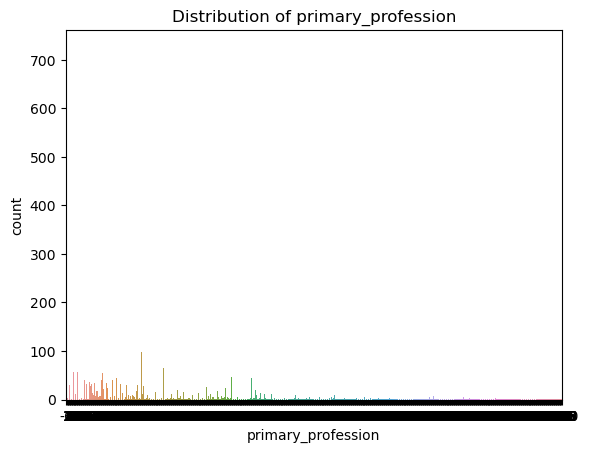

In [84]:
sns.countplot(x="primary_profession", data=person_df)
plt.title("Distribution of primary_profession")
plt.show()


Visualizing the numerical data


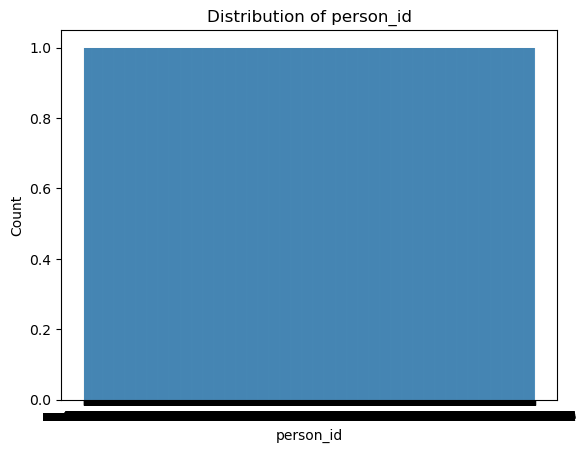

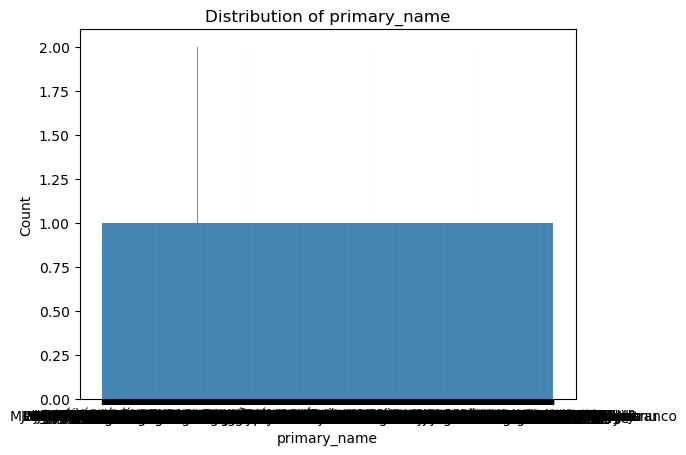

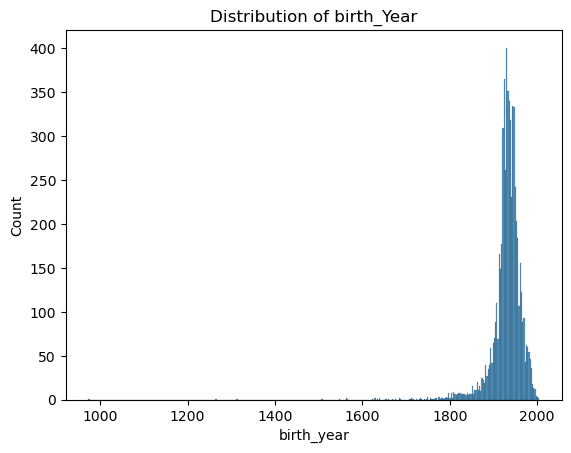

In [85]:
sns.histplot(x_variables["person_id"])
plt.title("Distribution of person_id")
plt.show()

sns.histplot(x_variables["primary_name"])
plt.title("Distribution of primary_name")
plt.show()

sns.histplot(x_variables["birth_year"])
plt.title("Distribution of birth_Year")
plt.show()

visualizing the relationship between the independent variables

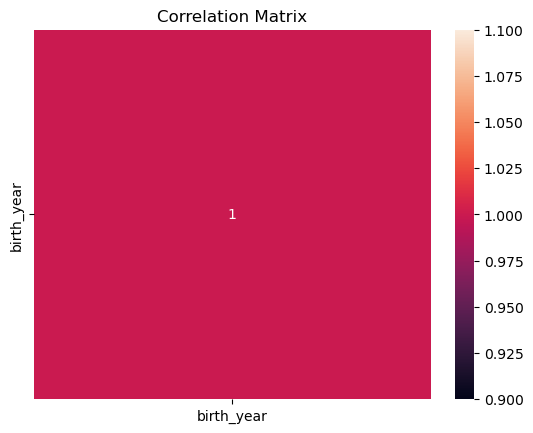

In [86]:
sns.heatmap(x_variables[["person_id", "primary_name", "birth_year"]].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

visualizing the relationship between independent variables and the target variables


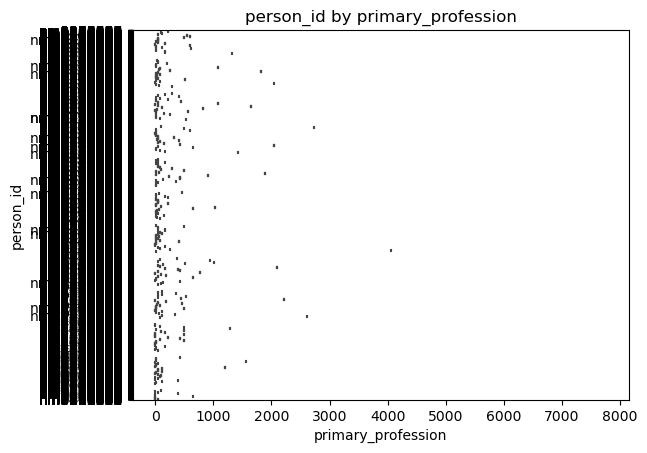

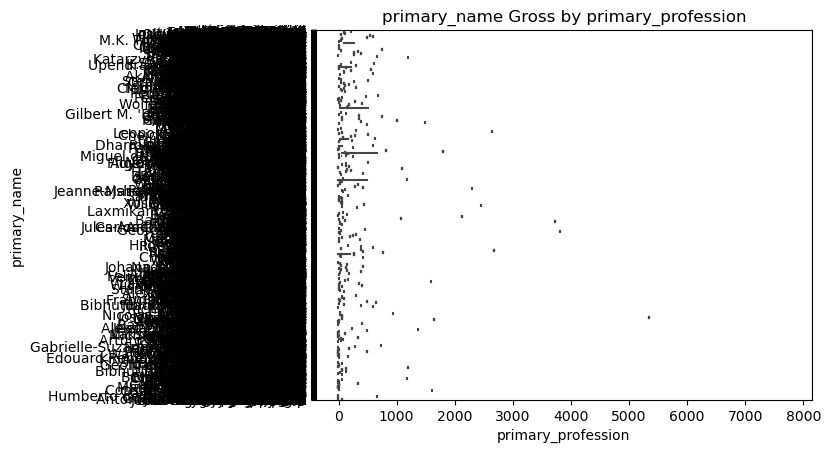

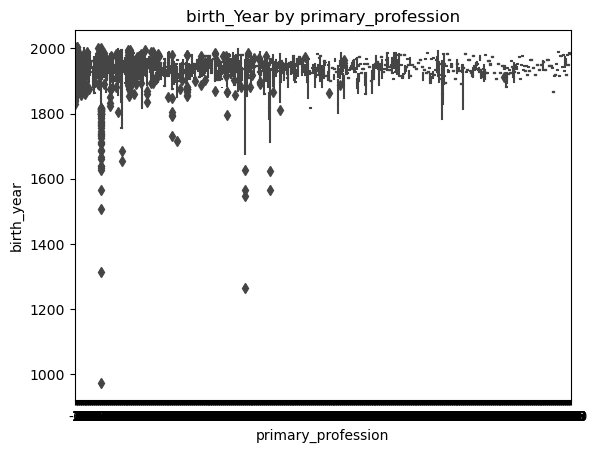

In [90]:
sns.boxplot(x="primary_profession", y="person_id", data=person_df)
plt.title("person_id by primary_profession")
plt.show()

sns.boxplot(x="primary_profession", y="primary_name", data=person_df)
plt.title("primary_name Gross by primary_profession")
plt.show()

sns.boxplot(x="primary_profession", y="birth_year", data=person_df)
plt.title("birth_Year by primary_profession")
plt.show()

In [91]:
#connecting to sqlite
conn = sqlite3.connect("im.db")

#querying details from the data base
principals_df=pd.read_sql_query("SELECT * FROM principals",conn)
                      
# Closing connection
conn.close()

# Display dataframe
principals_df.head()



,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [93]:
#checking the number of rows and coumns
principals_df.shape

(1028186, 6)

In [94]:
#checking the data types of the columns in the dataset

principals_df.dtypes


movie_id      object
ordering       int64
person_id     object
category      object
job           object
characters    object
dtype: object

In [95]:
#checking for missing values in the dataset

principals_df.isnull().sum()


movie_id           0
ordering           0
person_id          0
category           0
job           850502
characters    634826
dtype: int64

In [97]:
#cleaning and removing any unecessary columns

principals_df = principals_df.drop(["ordering"], axis=1)



In [98]:
#grouping the dataset by movie_id and category

grouped =principals_df.groupby(["movie_id", "category"])


In [99]:
#Aggregating the data by counting the number of unique person_ids in each group

counts = grouped["person_id"].nunique().reset_index(name="count")


Pivot the table to create a new DataFrame with movie_id as the index, category as the columns, and count as the values

In [100]:
pivot_table = counts.pivot(index="movie_id", columns="category", values="count")


In [101]:
#filling all the missing values with zeros in the pivot table

pivot_table = pivot_table.fillna(0)



In [102]:
#calculating total number of people involved in each movie

pivot_table["total"] = pivot_table.sum(axis=1)


In [103]:
#Sortin the pivot table by the total number of people in descending order

pivot_table = pivot_table.sort_values("total", ascending=False)


visulization using a bar chart of the top 10 movies with the highest number  uof people involved

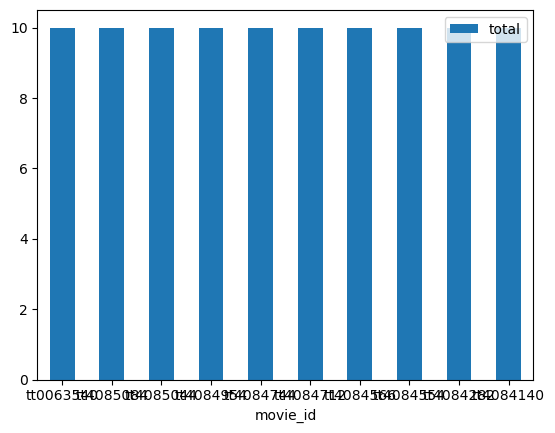

In [104]:
top_10 = pivot_table.head(10)
top_10.plot(kind="bar", y="total", rot=0)
plt.show()


In [105]:
#connecting to sqlite
conn = sqlite3.connect("im.db")

#querying details from the data base
movie_basics_df=pd.read_sql_query("SELECT * FROM movie_basics",conn)
                      
# Closing connection
conn.close()

# Display dataframe
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [106]:
#checking missing values and dropping rows containing missing values

movie_basics_df.dropna(inplace=True)


In [107]:
#creating new column 'year_category' to group the start year in categories

bins = [1950, 1970, 1990, 2010, 2023]
labels = ['Old', 'Classic', 'Modern', 'New']
movie_basics_df['year_category'] = pd.cut(movie_basics_df['start_year'], bins=bins, labels=labels)


In [108]:
#getting summary of numeric columns

movie_basics_df.describe()

,start_year,runtime_minutes
count,112232.000000,112232.000000
mean,2014.402078,86.261556
std,2.639042,167.896646
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2014.000000,87.000000
75%,2017.000000,99.000000
max,2022.000000,51420.000000


 visualization of the runtime_minutes columns to see the distribution of movie lengths

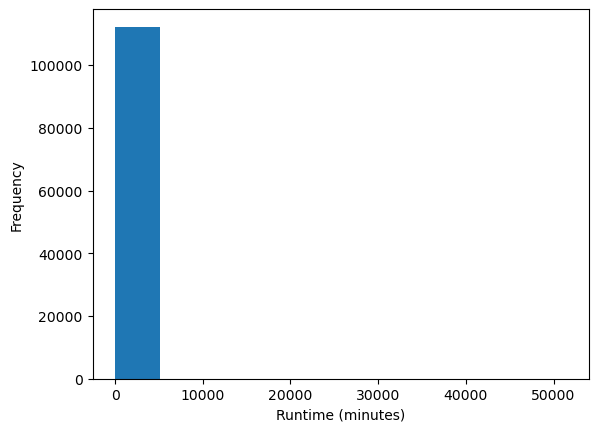

In [109]:


plt.hist(movie_basics_df['runtime_minutes'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
visualize the relationship between two numeric features start_year and runtime_minutes

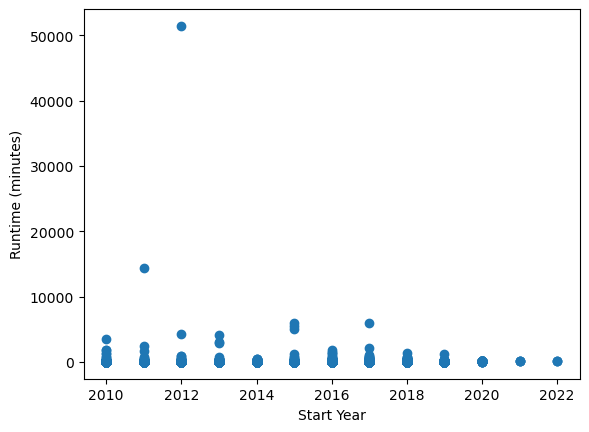

In [111]:
plt.scatter(movie_basics_df['start_year'], movie_basics_df['runtime_minutes'])
plt.xlabel('Start Year')
plt.ylabel('Runtime (minutes)')
plt.show()


In [112]:
#analyzing columns with the most common genres
from collections import Counter

genres_list = movie_basics_df['genres'].str.split(',', expand=True).stack().tolist()
genre_counts = Counter(genres_list)
print(genre_counts)




Counter({'Documentary': 43586, 'Drama': 41621, 'Comedy': 20843, 'Thriller': 9720, 'Horror': 8606, 'Biography': 8241, 'Action': 8110, 'Romance': 7782, 'Crime': 5851, 'History': 5793, 'Adventure': 5740, 'Family': 5608, 'Mystery': 4143, 'Music': 3800, 'Fantasy': 2940, 'Sci-Fi': 2727, 'Animation': 2292, 'Sport': 1949, 'News': 1524, 'War': 1229, 'Musical': 1140, 'Western': 388, 'Reality-TV': 60, 'Talk-Show': 19, 'Short': 10, 'Adult': 7, 'Game-Show': 2})
